# Compressão de dados, parte 1
## Aula 13

## Compressão sem perdas

* Métodos de compressão sem perdas são aqueles que permitem a restauração da informação original em sua totalidade;
* Nenhuma informação é perdida;
* São usados em situações em que perdas não são aceitáveis (e.g. imagens médicas, biometria, aplicações legais etc);
* As vezes são utilizados conjuntamente com processos de compressão com perdas, como o JPEG.

Alguns exemplos incluem:
* RLE (Run Length Encoding);
* Huffman;
* Lempel-Ziv.

Mais algumas técnicas incluem:
* LZ77;
* LZ78;
* Sannon-Fano;
* JPEG;
* Fractal compression;
* Wavelet compression;
* Dentre outras.

Por que comprimir dados?

* Reduz necessidade de atualizar hardware (tal como discos rígidos com mais espaço);
* Melhora eficiência de bancos de dados;
* Backups mais velozes;
* Pode aumentar a segurança de armazenamento (dados relevantes são mais difíceis de serem encontrados).

### Taxa de compressão

A taxa de compressão é dada pela fórmula:

$$\text{Taxa de compressão} = \frac{\text{Tamanho original}}{\text{Tamanho resultante}}$$

Quando maior a taxa, melhor foi a compressão!

## RLE

* Run-length encoding;
* Método de compressão de simples implementação;
* Consiste em indicar quantas vezes uma sequência de valores repetidos aparecem ao longo de uma imagem;
* Mais eficiente em imagens com muitas cores repetidas;
* Caso a imagem tenha muitos valores distintos, pode acabar deixando o resultado pior do que o original.


<div>
    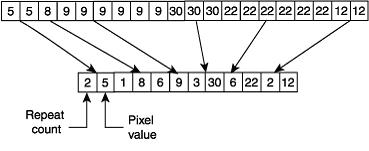
</div>

|Entrada|Valor atual|Contagem|Saída|
|-|-|-|-|
|AAABBC||0|\[\]|
|**A**AABBC|A|1|\[\]|
|A**A**ABBC|A|2|\[\]|
|AA**A**BBC|A|3|\[\]|
|AAA**B**BC|B|1|\[3, "A"\]|
|AAAB**B**C|B|2|\[3, "A"\]|
|AAABB**C**|C|1|\[3, "A", 2, "B"\]|
|AAABBC|||\[3, "A", 2, "B", 1, "C"\]|

In [1]:
def rle_encode(data):
    # Lista normal do Python
    encoding = []
    if not data:
        # Retorne nada se estiver vazio:
        return encoding
    
    prev = data[0]
    count = 0
    
    for value in data:
        if value != prev:
            # Se o valor atual for diferente dos anteriores, adiciona a contagem e o pixel anterior na nova linha
            encoding.append(count)
            encoding.append(prev)
                
            count = 1
            prev = value
        else:
            # Se for igual ao valor anterior, incrementa a contagem
            count += 1
            
    # Adiciona o último valor e sua contagem:
    encoding.append(count)
    encoding.append(prev)
    
    return encoding

In [2]:
data = [5, 5, 8, 9, 9, 9, 9, 9, 9, 30, 30, 30, 22, 22, 22, 22, 22, 22, 12, 12]
size_before = len(data)

compressed = rle_encode(data)
size_after = len(compressed)

print('Dados (antes):', data)
print('Tamanho dados (antes):', size_before)
print('Dados (depois):', compressed)
print('Tamanho dados (depois):', size_after)
print('Taxa de compressão:', size_before / size_after)

Dados (antes): [5, 5, 8, 9, 9, 9, 9, 9, 9, 30, 30, 30, 22, 22, 22, 22, 22, 22, 12, 12]
Tamanho dados (antes): 20
Dados (depois): [2, 5, 1, 8, 6, 9, 3, 30, 6, 22, 2, 12]
Tamanho dados (depois): 12
Taxa de compressão: 1.6666666666666667


Porém, caso tenhamos muitos dados distintos, acabamos deixando o vetor maior, tendo um efeito contraditório:

In [3]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
size_before = len(data)

compressed = rle_encode(data)
size_after = len(compressed)

print('Dados (antes):', data)
print('Tamanho dados (antes):', size_before)
print('Dados (depois):', compressed)
print('Tamanho dados (depois):', size_after)
print('Taxa de compressão:', size_before / size_after)

Dados (antes): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Tamanho dados (antes): 10
Dados (depois): [1, 1, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9, 1, 10]
Tamanho dados (depois): 20
Taxa de compressão: 0.5


Para imagens, a lógica é a mesma, podendo ser implementada de acordo com os seguintes variantes:

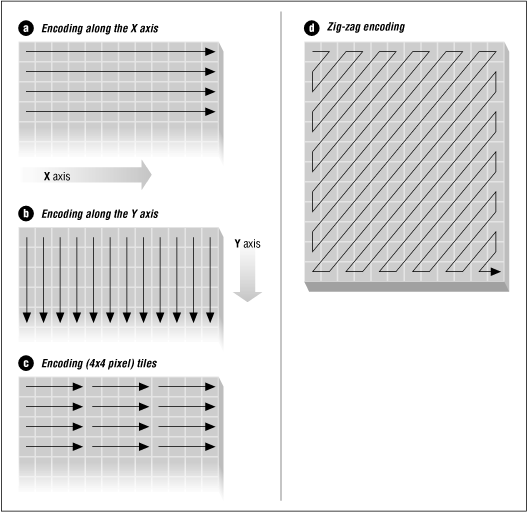

## Huffman

* A codificação de Huffman é um algoritmo da teoria da informação comprovadamente ótimo;
* No algoritmo, primeiramente encontram-se as probabilidades de cada valor, atribuindo códigos maiores aos de maior valor e menores ao de menor valor.

Exemplo de imagem a ser codificada:

<div>
    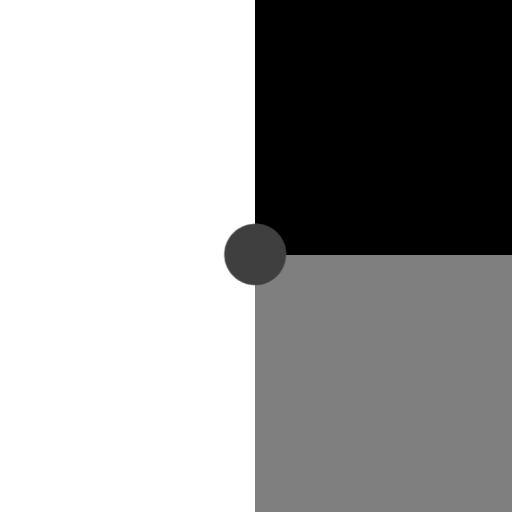
</div>

Plotando o histograma da imagem, obtemos:
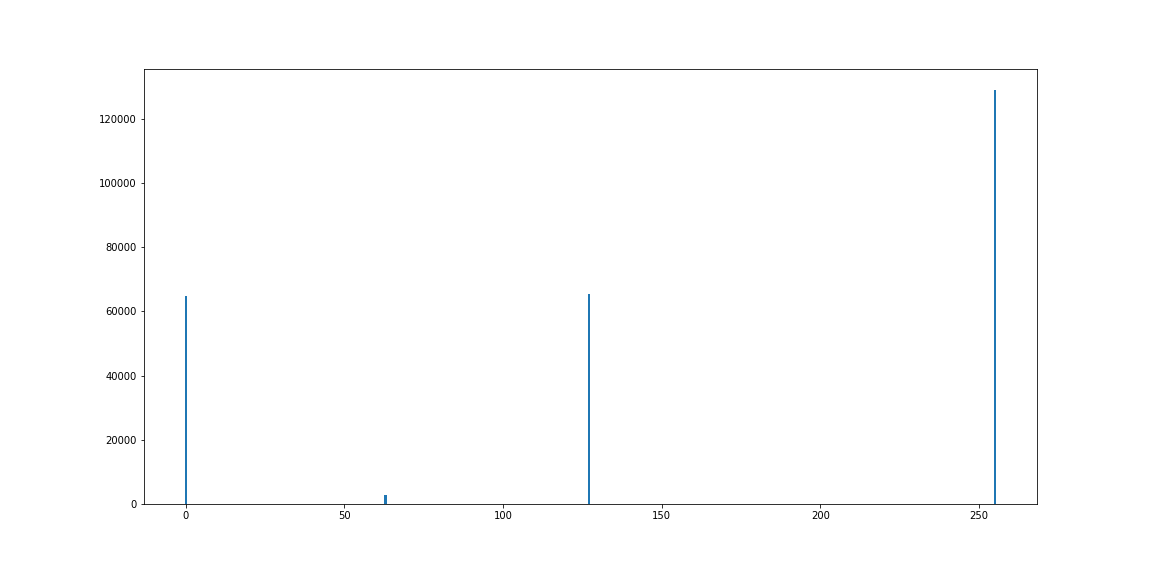

* Notam-se picos em 4 pontos: no branco absoluto, em dois tons de cinza e no preto absoluto;
* As probabilidades de cada valor podem ser calculadas dividindo as aparições de cada pelo número total de pixels da imagem.

```python
# [::-1] inverte o array, de forma a termos
# ele ordenado de maior para menor:
hist_sorted_indexes = np.argsort(hist)[::-1]
# O mesmo que np.sort(hist)[::-1]:
hist_sorted = hist[hist_sorted_indexes]

# Devemos remover os elementos cuja probabilidade é nula:
# Os índices serão filtrados por aqueles cuja
# probabilidade associada não é nula:
indexes = hist_sorted_indexes[hist_sorted > 0]
probs = hist[indexes] / img.size

probabilities = np.zeros(shape=(indexes.size, 2))
probabilities[:, 0] = indexes
probabilities[:, 1] = probs
```

Resultado:
```
255   0.49202728271484375
127   0.2490081787109375
0     0.24692535400390625
63    0.0102691650390625
65    0.0003662109375
...   ...```

`np.argsort` retorna os índices que correspondem ao vetor ordenado.

* Como esperado, pode-se observar que pouco menos de 50% dos pixels são brancos;
* Cerca de 25% são cinzas claros;
* Cerca de 25% são pretos;
* Cerca de 1% é cinza escuro;
* Menos de 1% são outras cores das bordas interpoladas do círculo.

#### Pseudocódigo

```octave
N = c.size
q = priority_queue()

for i = 1 to N
    n = node(c[i])
    q.push(n)
end for

while q.size is not equal to 1
    z = node()
    z.left = x = q.pop()
    z.right = y = q.pop()
    z.frequency = x.frequency + y.frequency
    q.push(z)
end while

return q
```

* Com isso, pode-se criar uma árvore binária, inserindo um 0 ao atravessar um nó esquerdo e um 1 ao atravessar um nó direito.
* Os nós mais frequentes terão códigos menores, enquanto os menos frequentes terão códigos maiores.

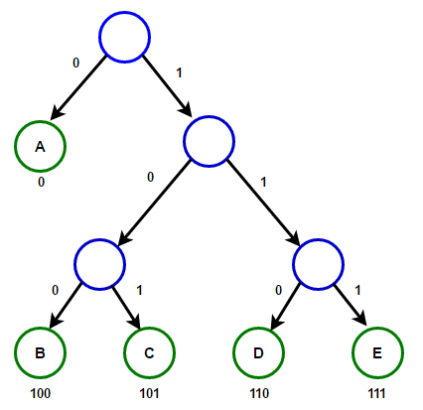

**Caracteres:** AAAAAABBBBBCCCCDDDEE

| Caracteres | A | B | C | D | E |
|-|-|-|-|-|-|
| **Valores** | 000 | 001 | 010 | 011 | 100 |

**Quantidade de Bits:** 6 * 3 + 5 * 3 + 4 * 3 + 3 * 3 + 2 * 3 = 60 bits

| Caracteres | A | B | C | D | E |
|-|-|-|-|-|-|
| **Contagem** | **6** | **5** | **4** | **3** | **2** |

| Caracteres | A | B | C | D | E |
|-|-|-|-|-|-|
| **Novos Valores** | 0 | 100 | 101 | 110 | 111 |

**Quantidade de Bits:** 6 * 1 + 5 * 3 + 4 * 3 + 3 * 3 + 2 * 3 = 48 bits

* Lembrando que é possível utilizar o RLE em conjunto com o Huffman, por exemplo, comprimindo os símbolos já substituídos pelos gerados pela codificação de Huffman.

## Lempel-Ziv-Welch

Uma visão em alto nível é como a seguir:
1. Inicialize o dicionário para conter todas as strings de comprimento igual a 1;
2. Encontre a string W mais longa no dicionário que corresponde à entrada;
3. Emita o índice no dicionário para W à saída e remova W da entrada;
4. Adicione W seguido do próximo símbolo da entrada ao dicionário;
5. Volte ao passo 2.

### Pseudocódigo
```
Initialize table with character strings
p = first input char
while not end of input stream
    c = next input character
    if p ++ c in the string table
        p = p ++ c
    else
        output the code for p
        add p ++ c to the string table
        p = c
    end if
end while

output the code for p
```

Um exemplo para a string `A_ASA_DA_CASA`:

<div>
    <img src="attachment:lzw.PNG" width="298">
</div>

O resultado final tem 10 códigos, sendo 7 códigos representados por 8 bits cada e 3 códigos representados por 9 bits cada. Assim, a saída tem 83 bits, se comparada com os 104 bits originais.

# Exercício

1. Implemente um decodificador para o RLE apresentado acima.

In [1]:
def rle_decode(data):
   
    result = []
    # a cada dois numeros em data o primeiro é o numero de repetições e o segundo é o valor
    for i in range(0, len(data), 2):
        for z in range(data[i]):
            result.append(data[i+1])
    return result


encoded_data = [2, 5, 1, 8, 6, 9, 3, 30, 6, 22, 2, 12]
resultado = rle_decode(encoded_data)
print(resultado)

[5, 5, 8, 9, 9, 9, 9, 9, 9, 30, 30, 30, 22, 22, 22, 22, 22, 22, 12, 12]


# Referências
* https://www.fileformat.info/mirror/egff/ch09_03.htm
* https://en.wikipedia.org/wiki/Lempel–Ziv–Welch

Aula remota, conforme Port. 345/2020 – MEC